**Dataset:-**  https://www.smartprix.com/laptops/

Domain Related reading :

https://www.slideshare.net/slideshow/laptop-buyer-survey-insights-survey-2022-by-91mobilespptx/251533495

In general,
 **online prices are lower than offline prices, with the exception of Argentina and Australia. In the United States, 69% of prices are identical online and offline.**


https://www.hbs.edu/ris/Publication%20Files/Cavallo_Alberto_J6_Are%20Online%20and%20Offline%20Prices%20Similar_2a1a63af-8938-4680-bb23-a850324b096a.pdf

The survey of over 8,000 laptop buyers in India found the following:

1) HP and Dell were the most popular brands owned with over 60% market share combined. Apple, Lenovo, and ASUS saw small gains in ownership over the past year.

2) When choosing a new laptop, performance was the most important factor for over 70% of respondents. Processor quality and screen technology were also highly important.

3) Most buyers spent between Rs. 30,000-50,000 on their current laptop, and **over half preferred to purchase laptops offline if prices were similar online/offline**

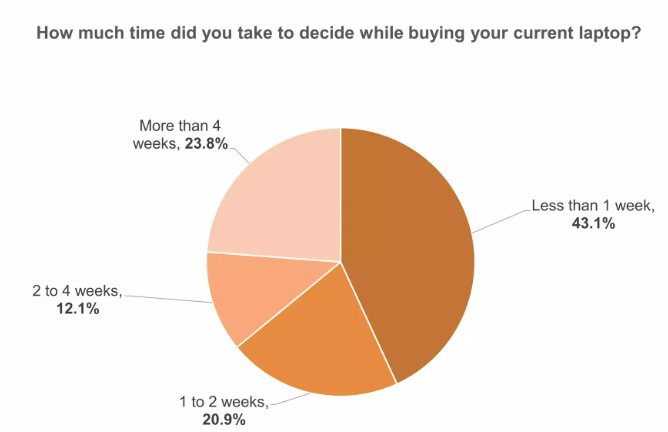

**36% people take 2 weeks or more to decide, while 24% take more than 4 weeks**

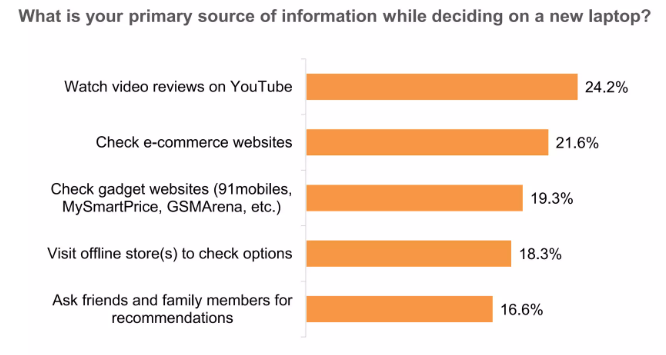

**25% watch video reviews on YouTube, while another 22% check e-comm sites**

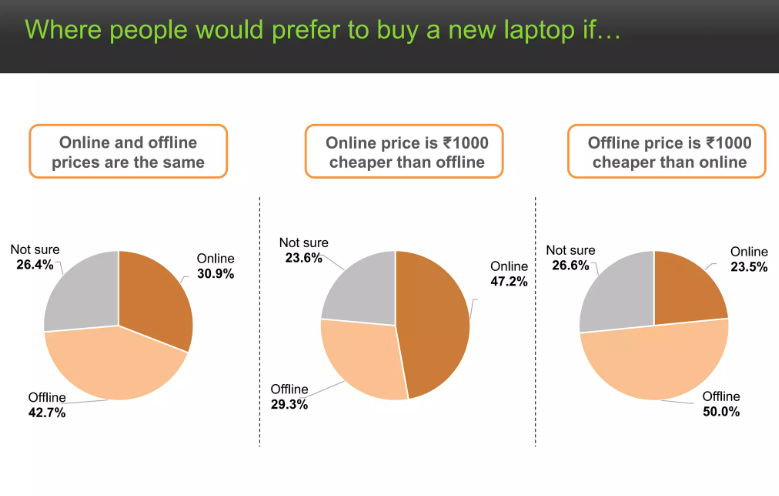

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
lpt_df = pd.read_csv('laptop_data.csv')

In [ ]:
lpt_df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
lpt_df.shape

(1303, 12)

In [ ]:
lpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


No null value


In [ ]:
lpt_df['Weight'] = lpt_df['Weight'].str.replace('kg', '')
lpt_df['Weight'] = lpt_df['Weight'].astype(float)

In [ ]:
lpt_df['Ram'] = lpt_df['Ram'].str.replace('GB','')


In [ ]:
lpt_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
lpt_df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


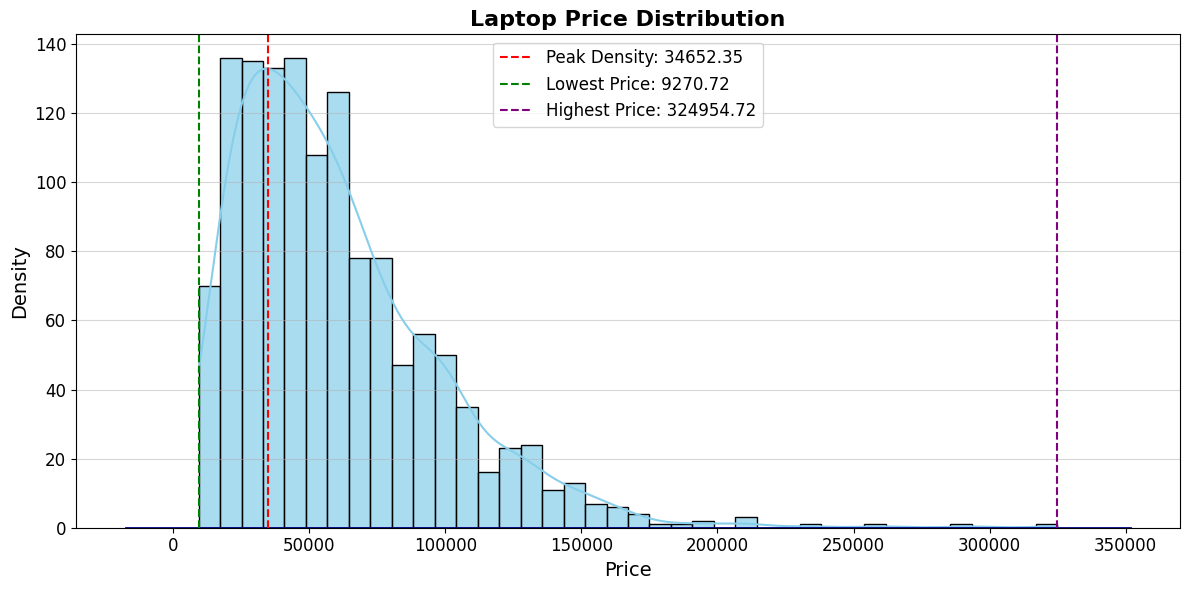

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improved Price Distribution Plot
plt.figure(figsize=(12, 6))

sns.histplot(lpt_df['Price'], kde=True, color='skyblue', bins=40, alpha=0.7, edgecolor='black') # More bins, transparency, and edge color

kde = sns.kdeplot(lpt_df['Price'], color='darkblue', linewidth=2) # Darker KDE line
x, y = kde.get_lines()[0].get_data()
x_peak = x[np.argmax(y)]

plt.axvline(x_peak, color='red', linestyle='--', linewidth=1.5, label=f'Peak Density: {x_peak:.2f}')

lowest_price = lpt_df['Price'].min()
highest_price = lpt_df['Price'].max()

plt.axvline(lowest_price, color='green', linestyle='--', linewidth=1.5, label=f'Lowest Price: {lowest_price:.2f}')
plt.axvline(highest_price, color='purple', linestyle='--', linewidth=1.5, label=f'Highest Price: {highest_price:.2f}')


plt.title('Laptop Price Distribution', fontsize=16, fontweight='bold') # More prominent title
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



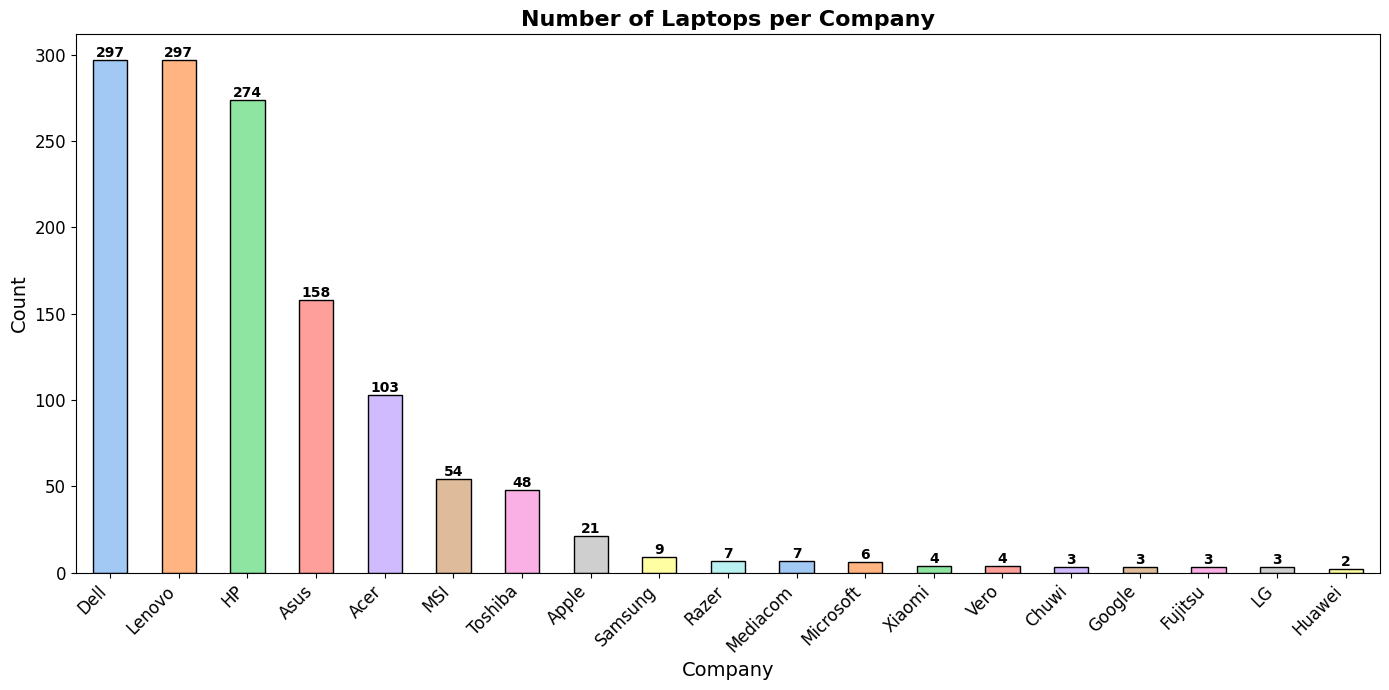

In [ ]:
# Improved Company Count Plot
plt.figure(figsize=(14, 7)) # Larger figure

company_counts = lpt_df['Company'].value_counts()
ax = company_counts.plot(kind='bar', color=sns.color_palette("pastel", len(company_counts)), edgecolor='black') # More colors


for index, value in enumerate(company_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.title('Number of Laptops per Company', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

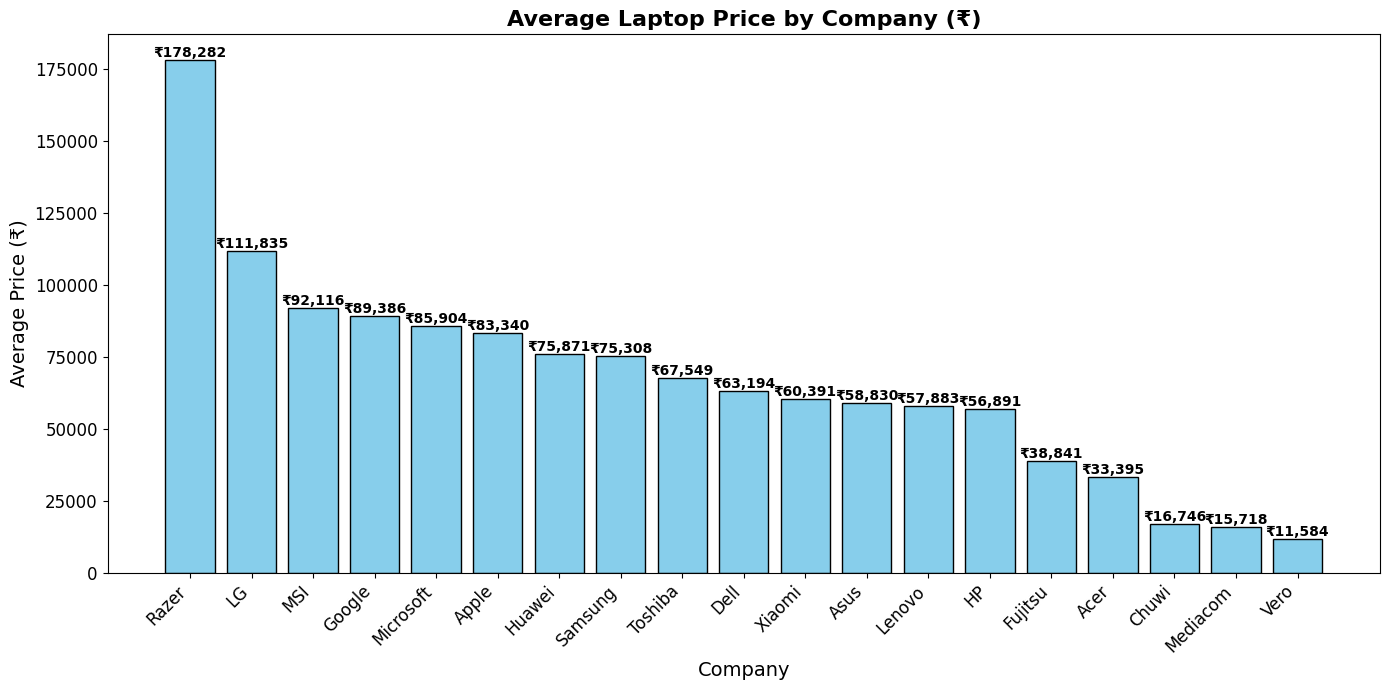

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_company = lpt_df.groupby('Company')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
bars = plt.bar(avg_price_by_company.index, avg_price_by_company.values, color='skyblue', edgecolor='black')

for bar, price in zip(bars, avg_price_by_company.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"₹{price:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average Laptop Price by Company (₹)', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Average Price (₹)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

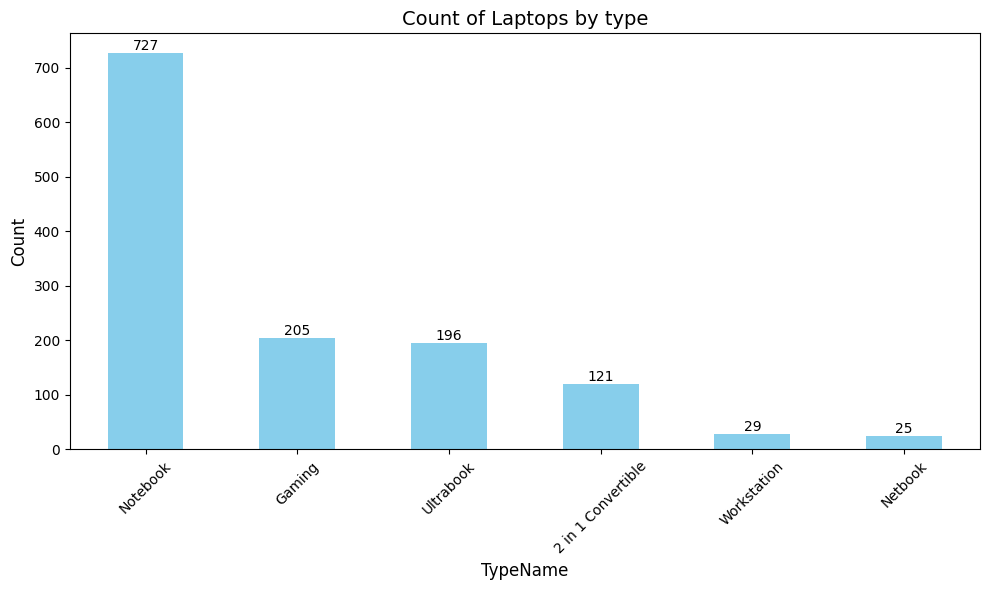

In [ ]:

ax = lpt_df['TypeName'].value_counts().plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add y-axis values on top of the bars
for index, value in enumerate(lpt_df['TypeName'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Count of Laptops by type', fontsize=14)
plt.xlabel('TypeName', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

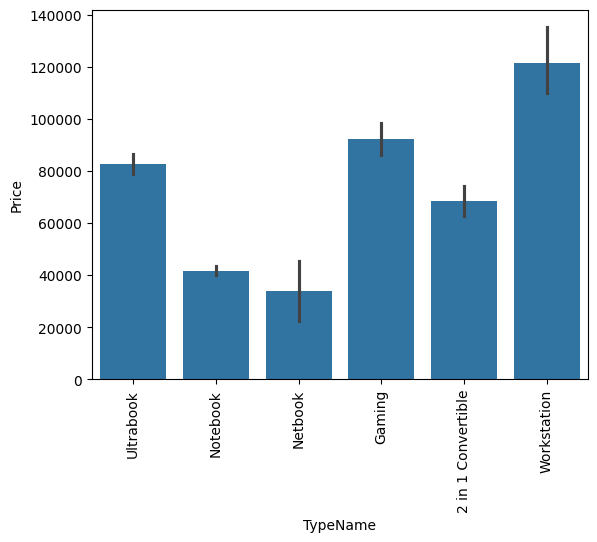

In [ ]:
sns.barplot(x=lpt_df['TypeName'],y=lpt_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

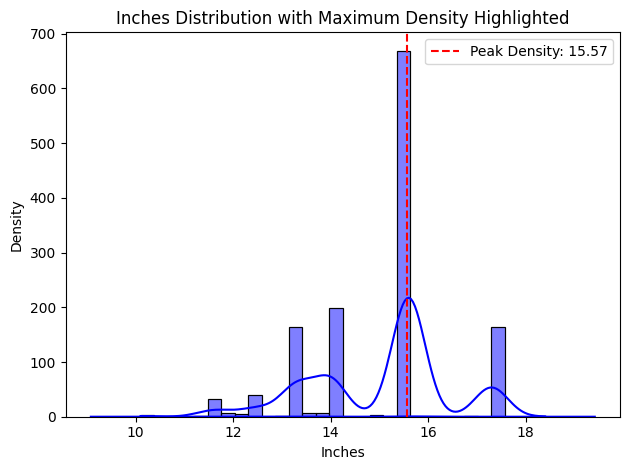

In [ ]:
# Calculate the KDE (Kernel Density Estimate) for Inches
kde = sns.kdeplot(lpt_df['Inches'], color='blue', fill=False)
x, y = kde.get_lines()[0].get_data()

# Find the x-value corresponding to the maximum density
x_peak = x[np.argmax(y)]

# Plot histogram and KDE for Inches
sns.histplot(lpt_df['Inches'], kde=True, color='blue', bins=30)

# Add a vertical line at the maximum density point
plt.axvline(x_peak, color='red', linestyle='--', label=f'Peak Density: {x_peak:.2f}')

# Add legend and labels
plt.legend()
plt.title('Inches Distribution with Maximum Density Highlighted')
plt.xlabel('Inches')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
lpt_df['ScreenResolution'].value_counts()


,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [ ]:
lpt_df['Touchscreen'] = lpt_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
lpt_df.sample(20)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
779,Asus,Notebook,15.6,1920x1080,Intel Pentium Dual Core N4200 1.1GHz,8,128GB SSD,Intel HD Graphics 505,Windows 10,2.00,31003.6320,0
968,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167778.7200,0
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.3200,1
797,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.95,43156.8000,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0
1246,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620.0000,0
1142,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,86793.1200,1
984,Toshiba,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.75,48751.2000,0
1125,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,88924.3200,1
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231.0400,0


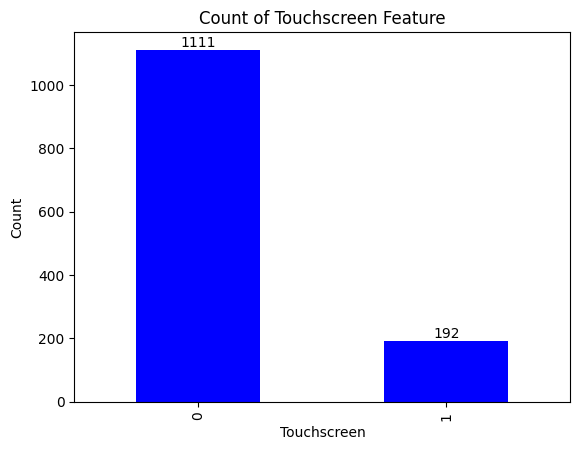

In [ ]:
lpt_df['Touchscreen'].value_counts().plot(kind='bar', color='blue')

# Adding the count annotations on each bar
plt.title('Count of Touchscreen Feature')
plt.ylabel('Count')
plt.xlabel('Touchscreen')

# Get the values and labels
value_counts = lpt_df['Touchscreen'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')  # Annotate each bar

plt.show()


<Axes: xlabel='Touchscreen', ylabel='Price'>

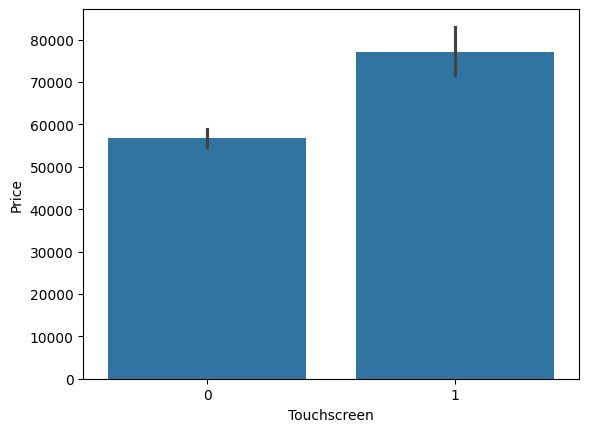

In [ ]:
sns.barplot(x=lpt_df['Touchscreen'],y=lpt_df['Price'])

An IPS display, or in-plane switching display, is a type of liquid-crystal display (LCD) monitor that offers a wide viewing angle, accurate colors, and better image quality than other types of displays

In [ ]:
lpt_df['Ips'] = lpt_df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
lpt_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


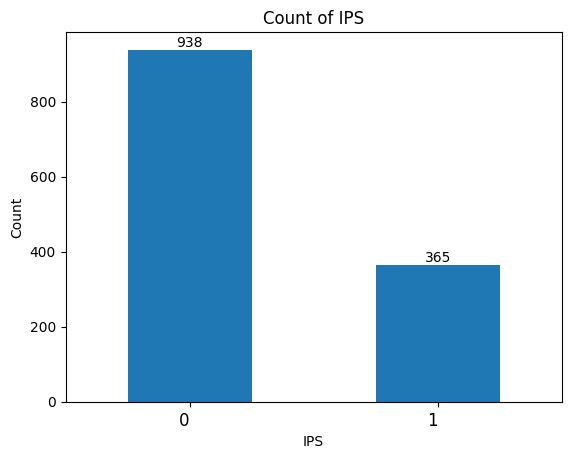

In [ ]:
lpt_df['Ips'].value_counts().plot(kind='bar')
# Adding the count annotations on each bar
plt.title('Count of IPS')
plt.ylabel('Count')
plt.xlabel('IPS')
plt.xticks(rotation=0, ha='right', fontsize=12)

# Get the values and labels
value_counts = lpt_df['Ips'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


<Axes: xlabel='Ips', ylabel='Price'>

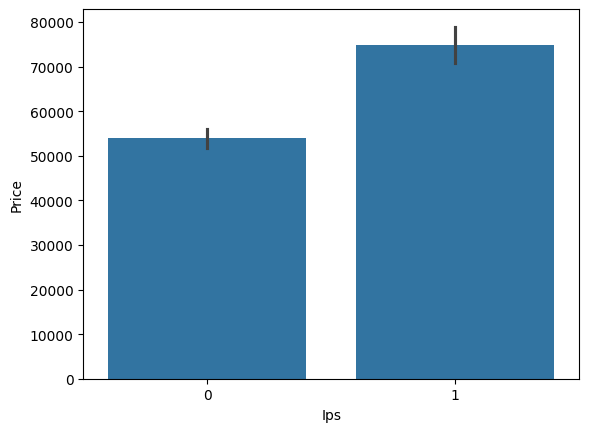

In [ ]:
sns.barplot(x=lpt_df['Ips'],y=lpt_df['Price'])

In [ ]:
new = lpt_df['ScreenResolution'].str.split('x',n=1,expand=True)

In [ ]:
lpt_df['X_res'] = new[0]
lpt_df['Y_res'] = new[1]

In [ ]:
lpt_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
862,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.05,68464.800,0,0,Full HD 1920,1080
730,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.800,0,1,IPS Panel Full HD 1920,1080
612,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,23650.992,0,0,1366,768
874,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23,98514.720,0,0,Full HD 1920,1080
36,Acer,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.760,0,0,1366,768


In [ ]:
lpt_df['X_res'] =lpt_df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
lpt_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
lpt_df['X_res'] = lpt_df['X_res'].astype('int')
lpt_df['Y_res'] = lpt_df['Y_res'].astype('int')
lpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 152.8+ KB


In [ ]:
# prompt: convert ram data type into int

lpt_df['Ram'] = lpt_df['Ram'].astype('int')

In [ ]:
# Select only numeric columns for correlation calculation.
numerical_cols = lpt_df.select_dtypes(include=['number']).columns
lpt_df_numeric = lpt_df[numerical_cols]

# Calculate and print the correlation with 'Price'
correlation_with_price = lpt_df_numeric.corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [ ]:
lpt_df['ppi'] = (((lpt_df['X_res']**2) + (lpt_df['Y_res']**2))**0.5/lpt_df['Inches']).astype('float')

In [ ]:
# Select only numeric columns for correlation calculation.
numerical_cols = lpt_df.select_dtypes(include=['number']).columns
lpt_df_numeric = lpt_df[numerical_cols]

# Calculate and print the correlation with 'Price'
correlation_with_price = lpt_df_numeric.corr()['Price']
print(correlation_with_price)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [ ]:
 lpt_df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
lpt_df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
lpt_df.drop(columns=['Inches','X_res','Y_res'],inplace=True)


In [ ]:
lpt_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
lpt_df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [ ]:
lpt_df['Cpu Name'] = lpt_df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
lpt_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [ ]:
 def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
lpt_df['Cpu brand'] = lpt_df['Cpu Name'].apply(fetch_processor)
lpt_df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


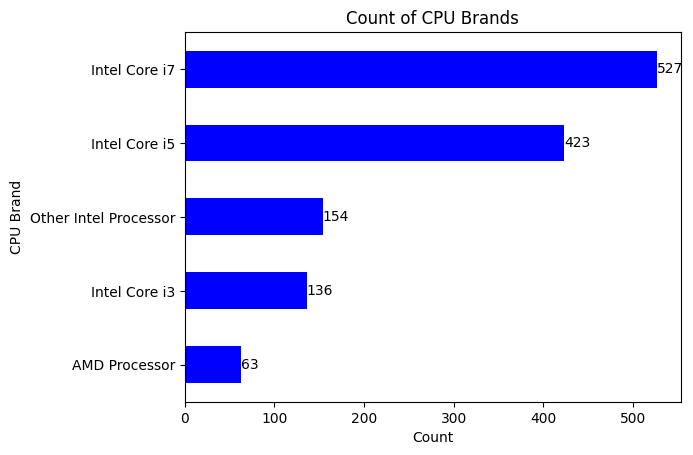

In [ ]:
# Sort values in descending order
cpu_brand_counts = lpt_df['Cpu brand'].value_counts().sort_values(ascending=True)

cpu_brand_counts.plot(kind='barh', color='blue')

# Adding titles and labels
plt.title('Count of CPU Brands')
plt.xlabel('Count')
plt.ylabel('CPU Brand')

# Adding count annotations
for i, count in enumerate(cpu_brand_counts):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

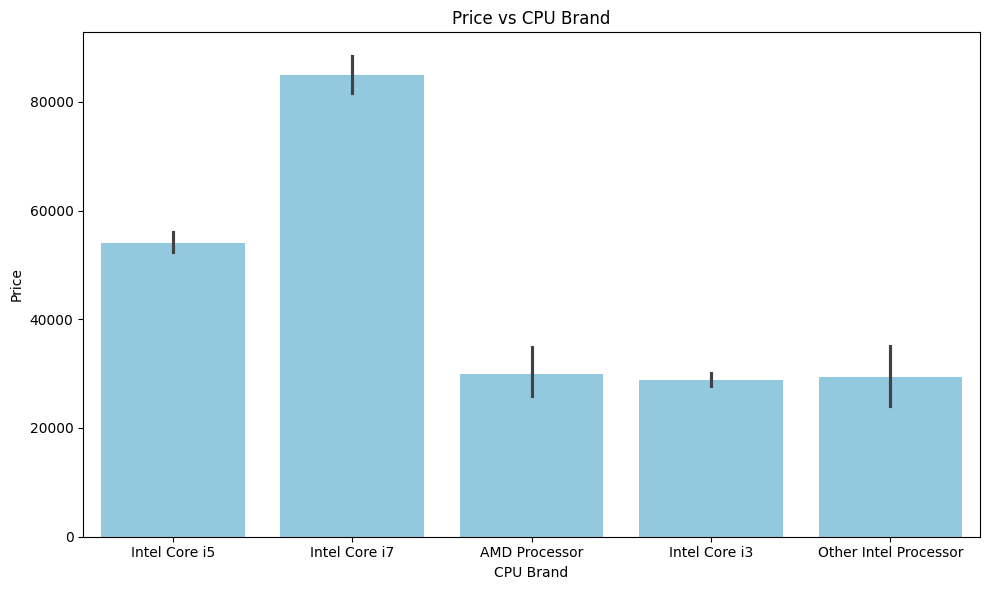

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=lpt_df['Cpu brand'], y=lpt_df['Price'], color='skyblue')
plt.xticks(rotation='horizontal')
plt.title('Price vs CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price')


plt.tight_layout()
plt.show()

In [ ]:

lpt_df.drop(columns=['Cpu','Cpu Name'],inplace=True)
lpt_df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


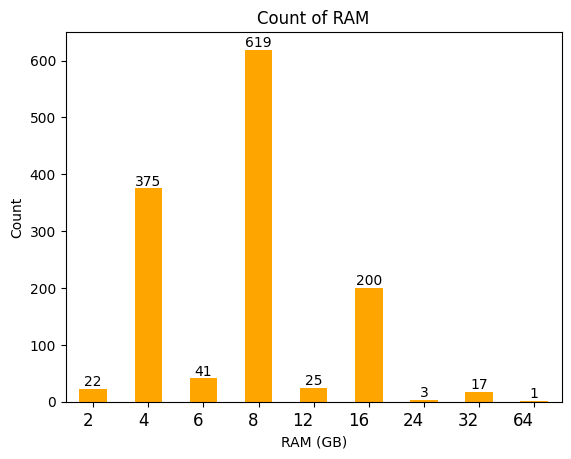

In [ ]:
import matplotlib.pyplot as plt

value_counts = lpt_df['Ram'].value_counts().sort_index()

value_counts.plot(kind='bar', color='orange')

# Adding titles and labels
plt.title('Count of RAM')
plt.ylabel('Count')
plt.xlabel('RAM (GB)')
plt.xticks(rotation=0, ha='right', fontsize=12)


# Adding count annotations
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


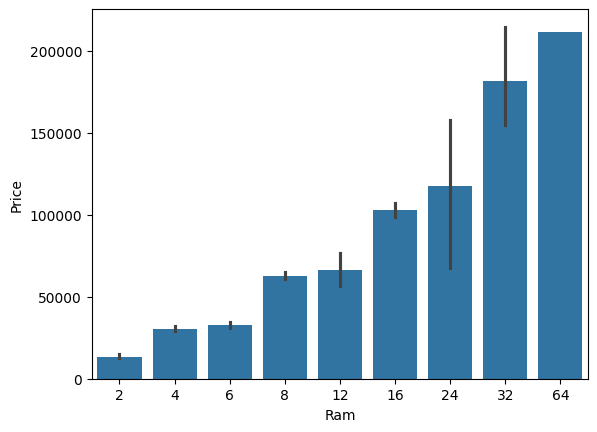

In [ ]:
 sns.barplot(x=lpt_df['Ram'],y=lpt_df['Price'])

 plt.xticks(rotation='horizontal')
 plt.show()

In [ ]:
lpt_df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [ ]:
Lpt_df= pd.read_csv("/content/Laptop data-entry - laptop_data (2).csv")

In [ ]:
Lpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   -1                1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1302 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
 12  Hinge             1298 non-null   float64
 13  Shutter           1299 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 142.6+ KB


In [ ]:
Lpt_df.head()

,-1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Hinge,Shutter
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.0,0.0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.0,0.0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1.0,0.0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.0,0.0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.0,0.0


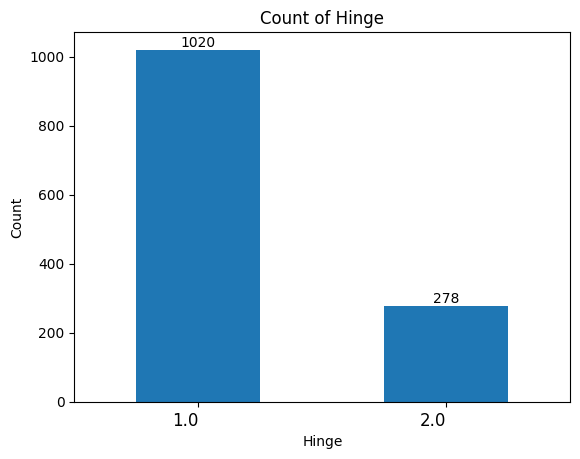

In [ ]:
Lpt_df['Hinge'].value_counts().plot(kind='bar')
# Adding the count annotations on each bar
plt.title('Count of Hinge')
plt.ylabel('Count')
plt.xlabel('Hinge')
plt.xticks(rotation=0, ha='right', fontsize=12)

# Get the values and labels
value_counts = Lpt_df['Hinge'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

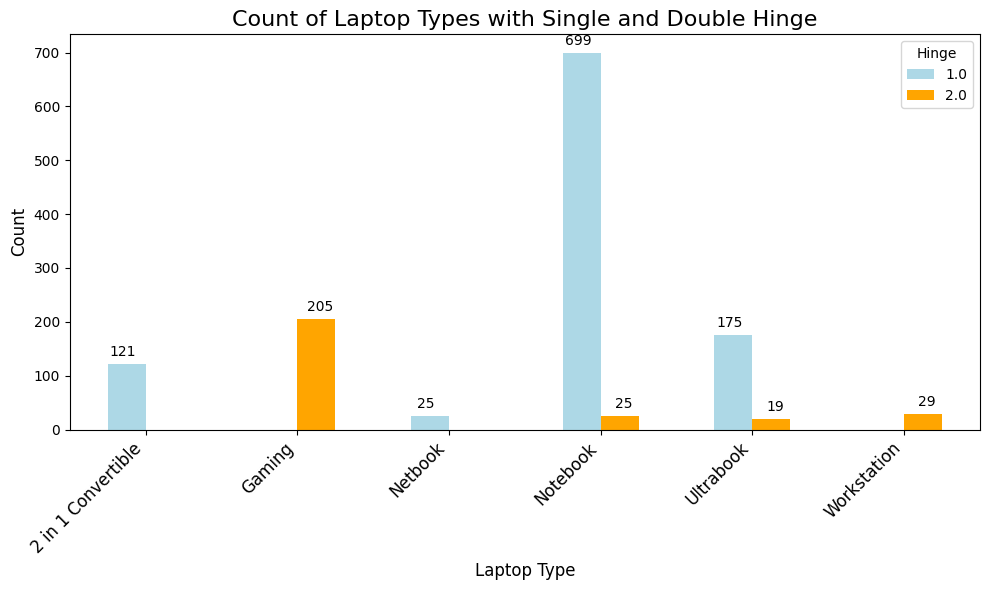

In [ ]:
# Group the data by 'TypeName' and 'Hinge' and count the occurrences
hinge_type_counts = Lpt_df.groupby(['TypeName', 'Hinge']).size().unstack(fill_value=0)

# Plot the count of each hinge type for each laptop type
ax = hinge_type_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'orange'])

# Adding titles and labels
plt.title('Count of Laptop Types with Single and Double Hinge', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Laptop Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count annotations with adjusted position for clarity
for i, (TypeName, row) in enumerate(hinge_type_counts.iterrows()):
    for j, count in enumerate(row):
        if count > 0:  # Annotate only if count is greater than 0
            # Adjust the x position for the annotations slightly based on the bar's position
            x_offset = -0.15 if j == 0 else 0.15  # Adjust left for first group, right for second
            plt.text(i + x_offset, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


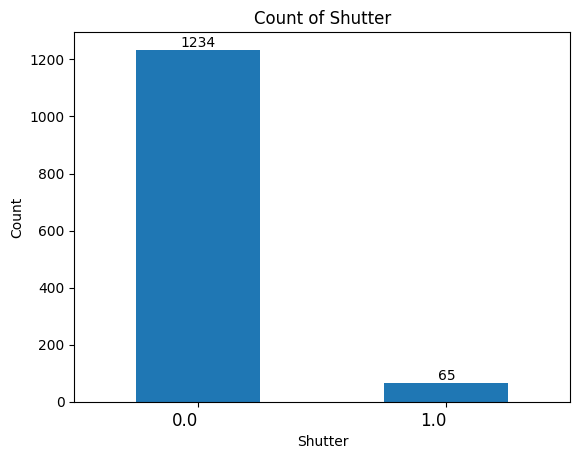

In [ ]:
Lpt_df['Shutter'].value_counts().plot(kind='bar')
# Adding the count annotations on each bar
plt.title('Count of Shutter')
plt.ylabel('Count')
plt.xlabel('Shutter')
plt.xticks(rotation=0, ha='right', fontsize=12)

# Get the values and labels
value_counts = Lpt_df['Shutter'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

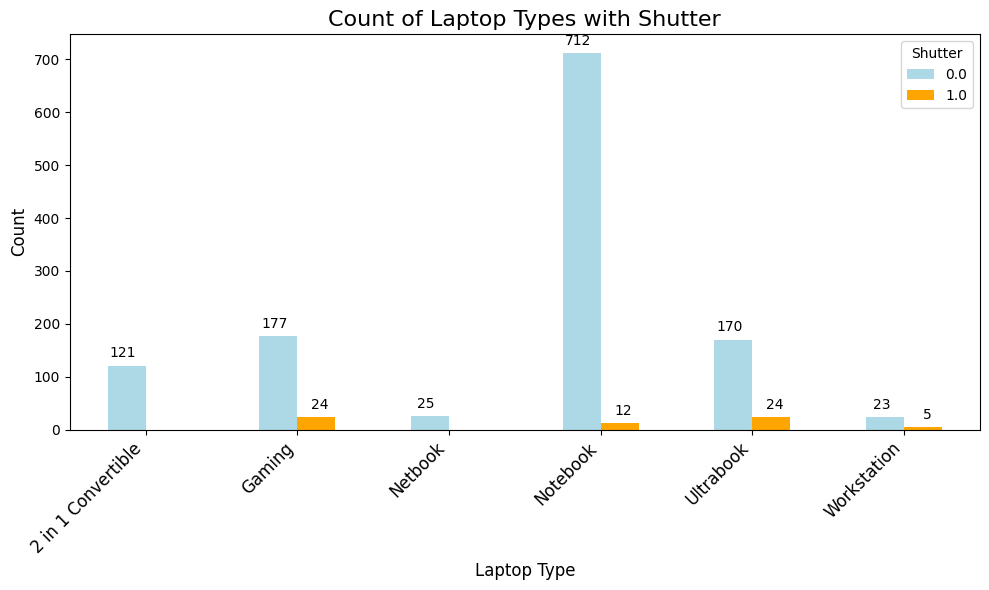

In [ ]:
# Group the data by 'TypeName' and 'Hinge' and count the occurrences
Shutter_type_counts = Lpt_df.groupby(['TypeName', 'Shutter']).size().unstack(fill_value=0)

# Plot the count of each Shutter type for each laptop type
ax = Shutter_type_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'orange'])

# Adding titles and labels
plt.title('Count of Laptop Types with Shutter', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Laptop Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding count annotations with adjusted position for clarity
for i, (TypeName, row) in enumerate(Shutter_type_counts.iterrows()):
    for j, count in enumerate(row):
        if count > 0:  # Annotate only if count is greater than 0
            # Adjust the x position for the annotations slightly based on the bar's position
            x_offset = -0.15 if j == 0 else 0.15  # Adjust left for first group, right for second
            plt.text(i + x_offset, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
lpt_df['Memory'] = lpt_df['Memory'].astype(str).replace('\.0', '', regex=True)
lpt_df["Memory"] = lpt_df["Memory"].str.replace('GB', '')
lpt_df["Memory"] = lpt_df["Memory"].str.replace('TB', '000')
new = lpt_df["Memory"].str.split("+", n=1, expand=True)
lpt_df["first"] = new[0]
lpt_df["first"] = lpt_df["first"].str.strip()
lpt_df["second"] = new[1]
lpt_df["Layer1HDD"] = lpt_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
lpt_df["Layer1SSD"] = lpt_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
lpt_df["Layer1Hybrid"] = lpt_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lpt_df["Layer1Flash_Storage"] = lpt_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
lpt_df['first'] = lpt_df['first'].str.replace(r'\D', '', regex=True)
lpt_df["second"].fillna("0", inplace=True)
lpt_df["Layer2HDD"] = lpt_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
lpt_df["Layer2SSD"] = lpt_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
lpt_df["Layer2Hybrid"] = lpt_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
lpt_df["Layer2Flash_Storage"] = lpt_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
lpt_df['second'] = lpt_df['second'].str.replace(r'\D', '', regex=True)
lpt_df["first"] = lpt_df["first"].astype(int)
lpt_df["second"] = lpt_df["second"].astype(int)
lpt_df["HDD"] = (lpt_df["first"] * lpt_df["Layer1HDD"] + lpt_df["second"] * lpt_df["Layer2HDD"])
lpt_df["SSD"] = (lpt_df["first"] * lpt_df["Layer1SSD"] + lpt_df["second"] * lpt_df["Layer2SSD"])
lpt_df["Hybrid"] = (lpt_df["first"] * lpt_df["Layer1Hybrid"] + lpt_df["second"] * lpt_df["Layer2Hybrid"])
lpt_df["Flash_Storage"] = (lpt_df["first"] * lpt_df["Layer1Flash_Storage"] + lpt_df["second"] * lpt_df["Layer2Flash_Storage"])
lpt_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

<ipython-input-48-cbc7e122d987>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lpt_df["second"].fillna("0", inplace=True)


In [ ]:

lpt_df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
941,Asus,Notebook,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.80,28238.40,0,0,106.113062,Other Intel Processor,1000,0,0,0
1035,HP,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.26,71874.72,0,0,176.232574,Intel Core i7,0,256,0,0
478,Dell,Notebook,8,1000 HDD,AMD Radeon 520,Windows 10,2.20,35964.00,0,0,141.211998,Intel Core i5,1000,0,0,0
1102,Acer,Notebook,4,16 SSD,Intel HD Graphics,Chrome OS,2.20,11135.52,0,0,100.454670,Other Intel Processor,0,16,0,0
422,HP,Notebook,8,256 SSD,Intel HD Graphics 630,Windows 10,2.31,76030.56,0,0,141.211998,Intel Core i7,0,256,0,0


In [ ]:
lpt_df.drop(columns=['Memory'],inplace=True)
lpt_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [ ]:
# Select only numeric columns for correlation calculation.
numerical_cols = lpt_df.select_dtypes(include=['number']).columns
lpt_df_numeric = lpt_df[numerical_cols]

# Calculate and print the correlation with 'Price'
correlation_with_price = lpt_df_numeric.corr()['Price']
print(correlation_with_price)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [ ]:
lpt_df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
lpt_df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [ ]:
lpt_df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [ ]:
lpt_df['Gpu brand'] = lpt_df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
lpt_df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
lpt_df['Gpu brand'].value_counts()


,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [ ]:
lpt_df = lpt_df[lpt_df['Gpu brand'] != 'ARM']


In [ ]:
lpt_df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


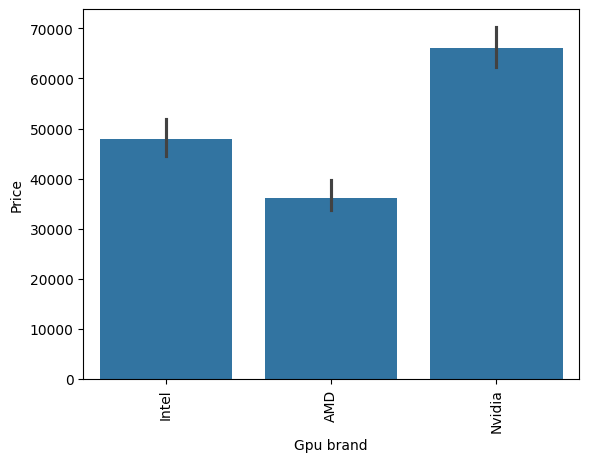

In [ ]:
sns.barplot(x=lpt_df['Gpu brand'],y=lpt_df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
lpt_df.drop(columns=['Gpu'],inplace=True)


In [ ]:
lpt_df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
lpt_df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
lpt_df['os'] = lpt_df['OpSys'].apply(cat_os)


In [ ]:
lpt_df.head()


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [ ]:
lpt_df.drop(columns=['OpSys'],inplace=True)

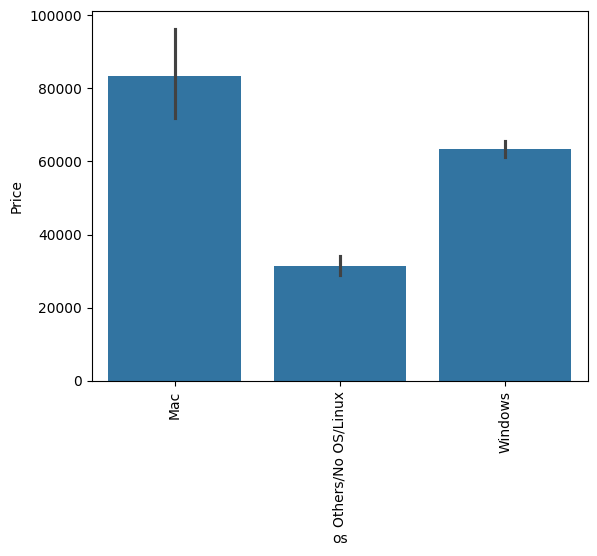

In [ ]:
sns.barplot(x=lpt_df['os'],y=lpt_df['Price'])
plt.xticks(rotation='vertical')
plt.show()


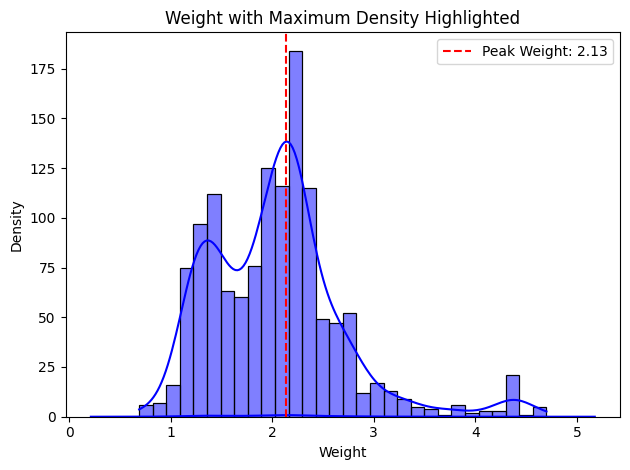

In [ ]:
# Calculate the KDE (Kernel Density Estimate) for Inches
kde = sns.kdeplot(lpt_df['Weight'], color='blue', fill=False)
x, y = kde.get_lines()[0].get_data()

# Find the x-value corresponding to the maximum density
x_peak = x[np.argmax(y)]

# Plot histogram and KDE for Inches
sns.histplot(lpt_df['Weight'], kde=True, color='blue', bins=30)

# Add a vertical line at the maximum density point
plt.axvline(x_peak, color='red', linestyle='--', label=f'Peak Weight: {x_peak:.2f}')

# Add legend and labels
plt.legend()
plt.title('Weight with Maximum Density Highlighted')
plt.xlabel('Weight')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


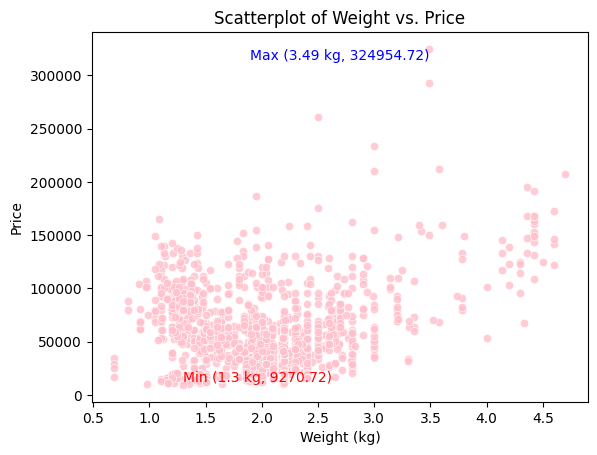

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatterplot with pastel points
sns.scatterplot(x=lpt_df['Weight'], y=lpt_df['Price'], color="pink", alpha=0.8)

# Finding the min and max points
min_price_idx = lpt_df['Price'].idxmin()
max_price_idx = lpt_df['Price'].idxmax()

min_point = lpt_df.loc[min_price_idx]
max_point = lpt_df.loc[max_price_idx]

# Label the points with weight in kg
plt.text(min_point['Weight'], min_point['Price'],
         f"Min ({min_point['Weight']} kg, {min_point['Price']})",
         color='red', ha='left', va='bottom')
plt.text(max_point['Weight'], max_point['Price'],
         f"Max ({max_point['Weight']} kg, {max_point['Price']})",
         color='blue', ha='right', va='top')

# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.title('Scatterplot of Weight vs. Price')

# Show the plot
plt.show()


In [ ]:
# Select only numeric columns for correlation calculation.
numerical_cols = lpt_df.select_dtypes(include=['number']).columns
lpt_df_numeric = lpt_df[numerical_cols]

# Calculate and print the correlation with 'Price'
correlation_with_price = lpt_df_numeric.corr()['Price']
print(correlation_with_price)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


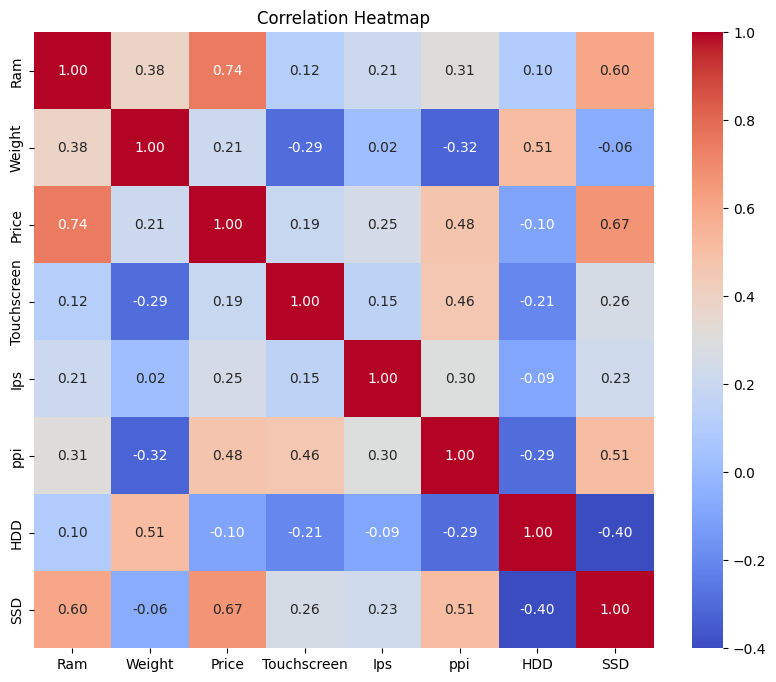

In [ ]:
# Select only numeric columns for correlation calculation
numerical_cols = lpt_df.select_dtypes(include=['number']).columns
lpt_df_numeric = lpt_df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = lpt_df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

<ipython-input-72-8bb94d16f674>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(lpt_df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

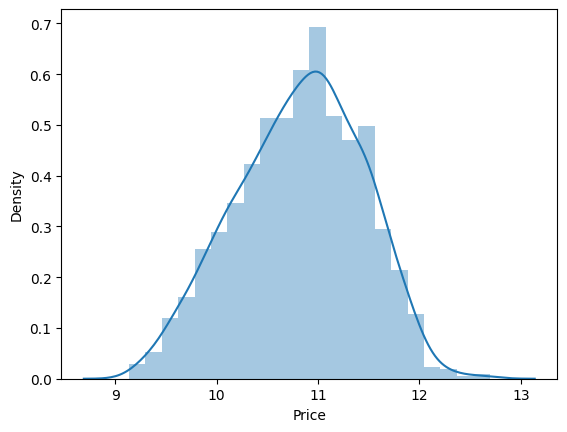

In [ ]:
 sns.distplot(np.log(lpt_df['Price']))

In [ ]:
X = lpt_df.drop(columns=['Price'])
y = np.log(lpt_df['Price'])

In [ ]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [ ]:
lpt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int64  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 174.7+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
 from sklearn.linear_model import LinearRegression,Ridge,Lasso
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
 from sklearn.svm import SVR

Linear regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11]) # Removing 'sparse=False', and adding handle_unknown='ignore' for compatibility
],remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277450155137
MAE 0.21017827953019044


KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11]) # Removing 'sparse=False', and adding handle_unknown='ignore' for compatibility
],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.801666685558707
MAE 0.19347870380623616


Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first', handle_unknown='ignore'),[0,1,7,10,11]) # Removing 'sparse=False', and adding handle_unknown='ignore' for compatibility
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


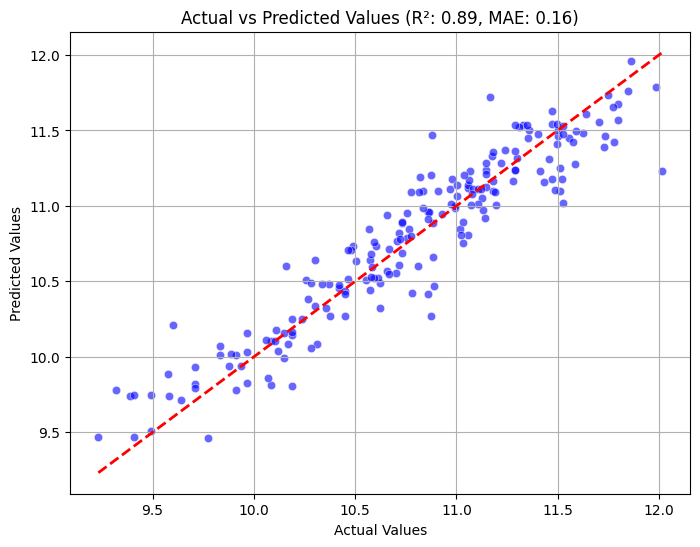

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

# Predicting values
y_pred = pipe.predict(X_test)

# Calculate R2 score and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Plotting Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)

# Adding labels and title
plt.title(f'Actual vs Predicted Values (R²: {r2:.2f}, MAE: {mae:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Show the plot
plt.show()


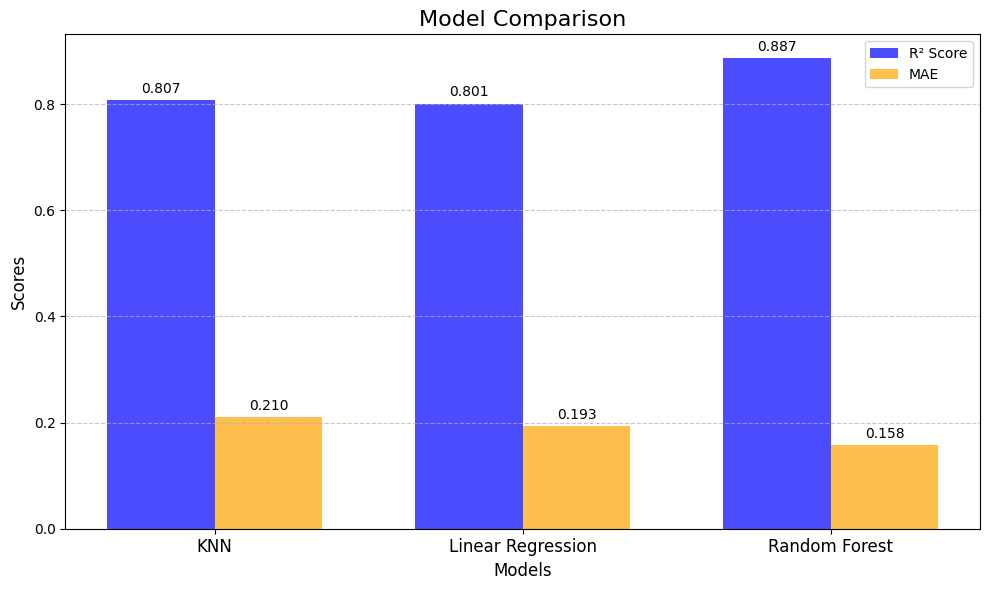

               Model  R² Score    MAE
0                KNN     0.807  0.210
1  Linear Regression     0.801  0.193
2      Random Forest     0.887  0.158


In [ ]:
# Storing the results
models = ['KNN', 'Linear Regression', 'Random Forest']
r2_scores = [0.807, 0.801, 0.887]
mae_scores = [0.210, 0.193, 0.158]

# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'MAE': mae_scores
})

# Plotting side-by-side bars
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, r2_scores, width, label='R² Score', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, mae_scores, width, label='MAE', color='orange', alpha=0.7)

# Adding labels, title, and grid
ax.set_xlabel('Models', fontsize=12)
ax.set_title('Model Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Annotating the bars with their values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset for the text
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

# Print the results table
print(results_df)

Exporting the Model

In [ ]:
import pickle
pickle.dump(lpt_df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
lpt_df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
 X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


#Testing model


On basis of price


In [ ]:
import pickle
import numpy as np

# Load the model and dataframe
pipe = pickle.load(open('pipe.pkl','rb'))
lpt_df = pickle.load(open('df.pkl','rb'))

# Sample input
input_data = {
    'Company': 'HP',
    'TypeName': 'Notebook',
    'Ram': 8,
    'Weight': 1.86,
    'Cpu brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 256,
    'Gpu brand': 'Nvidia',
    'os': 'Windows'
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

#
input_df = input_df.reindex(columns=lpt_df.drop('Price', axis=1).columns, fill_value=0)

# Make the prediction
predicted_price_log = pipe.predict(input_df)
predicted_price = np.exp(predicted_price_log[0])

print(f"Predicted Price: ₹{predicted_price:.2f}")

# Example recommendation based on price similarity
price_diff = np.abs(lpt_df['Price'] - predicted_price)
recommended_laptops = lpt_df.sort_values(by='Price', key=lambda x: price_diff).head(5)
print("\nRecommended Laptops:")
recommended_laptops

Predicted Price: ₹36421.10

Recommended Laptops:


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
1009,HP,Notebook,4,1.64,36443.5200,0,0,111.935204,Intel Core i3,500,0,Intel,Windows
881,HP,2 in 1 Convertible,4,2.30,36486.1440,1,0,100.454670,Intel Core i5,500,0,Intel,Windows
920,Dell,Notebook,4,2.18,36496.2672,0,0,100.454670,Intel Core i5,1000,0,AMD,Windows
574,Lenovo,Notebook,4,2.05,36496.8000,0,0,141.211998,Intel Core i5,500,0,Intel,Windows
947,Lenovo,Notebook,8,2.20,36496.8000,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Others/No OS/Linux


In [ ]:
import pickle
import numpy as np
import pandas as pd # This was missing and has been added.

# Load the model and dataframe
pipe = pickle.load(open('pipe.pkl','rb'))
lpt_df = pickle.load(open('df.pkl','rb'))

# Sample input
input_data = {
    'Company': 'Apple',
    'TypeName': 'Ultrabook',
    'Ram': 8,
    'Weight': 0.92,
    'Cpu brand': 'Intel Core i5',
    'HDD': 0,
    'SSD': 0,
    'Gpu brand': 'Intel	',
    'os': 'Mac'
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

input_df = input_df.reindex(columns=lpt_df.drop('Price', axis=1).columns, fill_value=0)

# Make the prediction
predicted_price_log = pipe.predict(input_df)
predicted_price = np.exp(predicted_price_log[0])

print(f"Predicted Price: ₹{predicted_price:.2f}")

# Example recommendation based on price similarity
price_diff = np.abs(lpt_df['Price'] - predicted_price) #Make sure this is price as well
recommended_laptops = lpt_df.sort_values(by='Price', key=lambda x: price_diff).head(5)

print("\nRecommended Laptops:")
recommended_laptops

Predicted Price: ₹50273.60

Recommended Laptops:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
331,Toshiba,Notebook,8,2.00,50243.04,0,1,141.211998,Intel Core i5,0,256,Intel,Windows
855,Dell,Notebook,8,1.90,50349.60,0,0,141.211998,Intel Core i5,0,128,Intel,Windows
361,Asus,Notebook,8,2.00,50349.60,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
63,Asus,Notebook,8,1.40,50136.48,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
1079,HP,Notebook,4,2.31,50083.20,0,0,141.211998,Intel Core i5,500,0,Intel,Windows


In [ ]:
import pickle
import numpy as np
import pandas as pd # This was missing and has been added.

# Load the model and dataframe
pipe = pickle.load(open('pipe.pkl','rb'))
lpt_df = pickle.load(open('df.pkl','rb'))

# Sample input
input_data = {
    'Company': 'HP',
    'TypeName': 'Notebook	',
    'Ram': 4,
    'Weight': 2.31,
    'Cpu brand': 'Intel Core i5',
    'HDD': 500,
    'SSD': 0,
    'Gpu brand': 'Intel	',
    'os': 'Windows'
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

input_df = input_df.reindex(columns=lpt_df.drop('Price', axis=1).columns, fill_value=0)

# Make the prediction
predicted_price_log = pipe.predict(input_df)
predicted_price = np.exp(predicted_price_log[0])

print(f"Predicted Price: ₹{predicted_price:.2f}")

# Example recommendation based on price similarity
price_diff = np.abs(lpt_df['Price'] - predicted_price) #Make sure this is price as well
recommended_laptops = lpt_df.sort_values(by='Price', key=lambda x: price_diff).head(5)

print("\nRecommended Laptops:")
recommended_laptops

Predicted Price: ₹47390.00

Recommended Laptops:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
518,HP,Notebook,8,2.04,47365.92,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
1205,Dell,Notebook,8,2.36,47365.92,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
524,Dell,Notebook,8,2.80,47365.92,0,1,127.335675,Intel Core i5,1000,128,AMD,Others/No OS/Linux
994,Dell,2 in 1 Convertible,8,1.68,47365.92,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
242,Asus,Notebook,8,2.69,47365.92,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Others/No OS/Linux
